<a href="https://colab.research.google.com/github/valeromora/TAM_2025-1/blob/main/Parcial2/Parcial2_punto_b_y_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 2 punto **B**
Utilizando la base de datos USPS, proyecte el conjunto de
datos en un espacio de menor dimension empleando los
metodos PCA y UMAP. En cada caso, represente graficamente el espacio proyectado, utilizando colores para indicar
la etiqueta de cada muestra. Adicionalmente, incluya algunas imagenes representativas superpuestas sobre el espacio proyectado. Analice las diferencias entre los espacios obtenidos y explore como varıa la representacion al modificar el numero de vecinos en UMAP, discutiendo el impacto de este
parametro en la estructura del espacio latente.

In [ ]:
import pandas as pd
import h5py
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import umap
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.manifold import TSNE # Although not used for reduction here, t-SNE has a good image plotting example

#Carga y preparación de los datos


In [ ]:
# https://www.kaggle.com/datasets/bistaumanga/usps-dataset
# Load the dataset from the .h5 file using h5py
try:
    path = '/content/usps.h5'
    with h5py.File(path, 'r') as hf:
        train = hf.get('train')
        X_tr = train.get('data')[:]
        y_tr = train.get('target')[:]
        test = hf.get('test')
        X_te = test.get('data')[:]
        y_te = test.get('target')[:]

    # Combine training and testing data
    X = np.concatenate((X_tr, X_te), axis=0)
    y = np.concatenate((y_tr, y_te), axis=0)


    # Print the shapes of X and y
    print("Shape of X:", X.shape)
    print("Shape of y:", y.shape)

    # Display the first 5 rows of X and y (as they are numpy arrays now)
    print("First 5 rows of X:")
    print(X[:5])
    print("First 5 rows of y:")
    print(y[:5])

except FileNotFoundError:
    print("Error: 'usps.h5' not found in /content/. Please ensure the dataset file is in the correct directory.")
except KeyError as e:
    print(f"Error accessing data keys in the .h5 file: {e}. Please check the structure of the usps.h5 file.")
except Exception as e:
    print(f"An error occurred: {e}")

Shape of X: (9298, 256)
Shape of y: (9298,)
First 5 rows of X:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.1645     0.086      0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05849999 0.         0.        ]]
First 5 rows of y:
[6 5 4 7 3]


#Reducción de dimensionalidad

## PCA

Shape of X after PCA: (9298, 2)


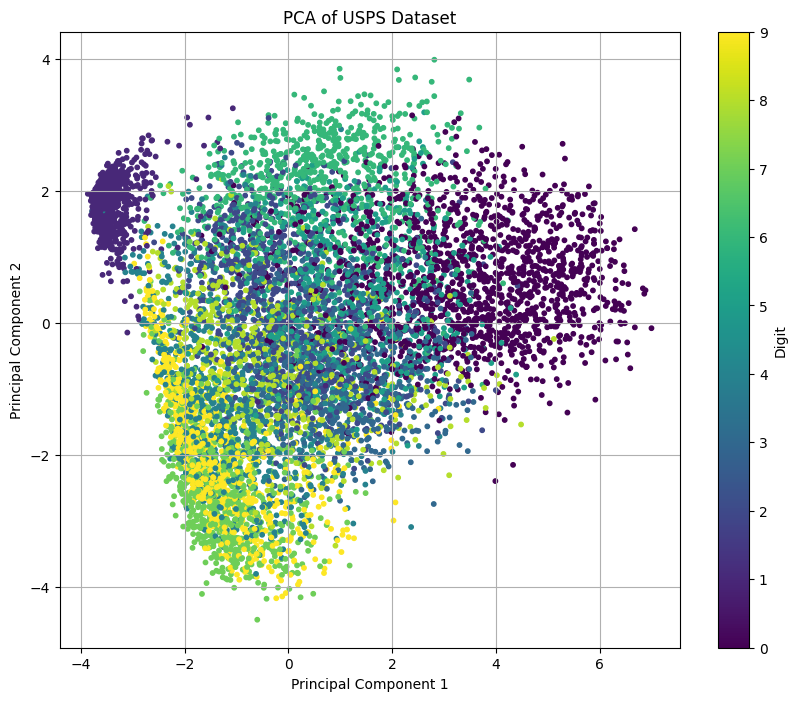

In [ ]:
# Apply PCA
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Print the shape of the reduced data
print("Shape of X after PCA:", X_pca.shape)

# Visualize the PCA result
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=10)
plt.title('PCA of USPS Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Digit')
plt.grid(True)
plt.show()

## UMAP

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Shape of X after UMAP (default n_neighbors): (9298, 2)


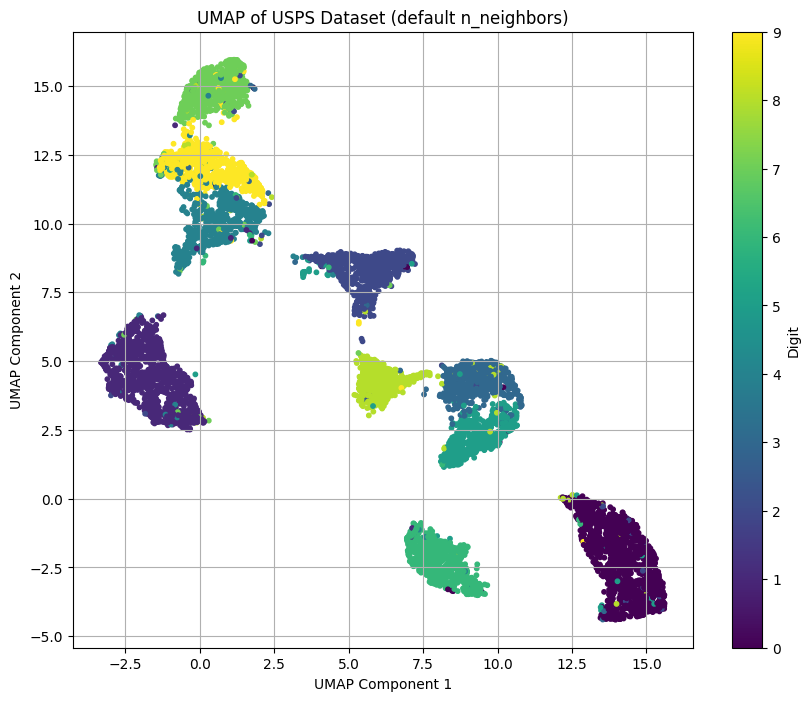

In [ ]:
# Apply UMAP with default parameters
umap_reducer_default = umap.UMAP(random_state=42) # Use a random state for reproducibility
X_umap_default = umap_reducer_default.fit_transform(X)

# Print the shape of the reduced data
print("Shape of X after UMAP (default n_neighbors):", X_umap_default.shape)

# Visualize the UMAP result with default n_neighbors
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap_default[:, 0], X_umap_default[:, 1], c=y, cmap='viridis', s=10)
plt.title('UMAP of USPS Dataset (default n_neighbors)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(scatter, label='Digit')
plt.grid(True)
plt.show()

# Superposición de imágenes representativas

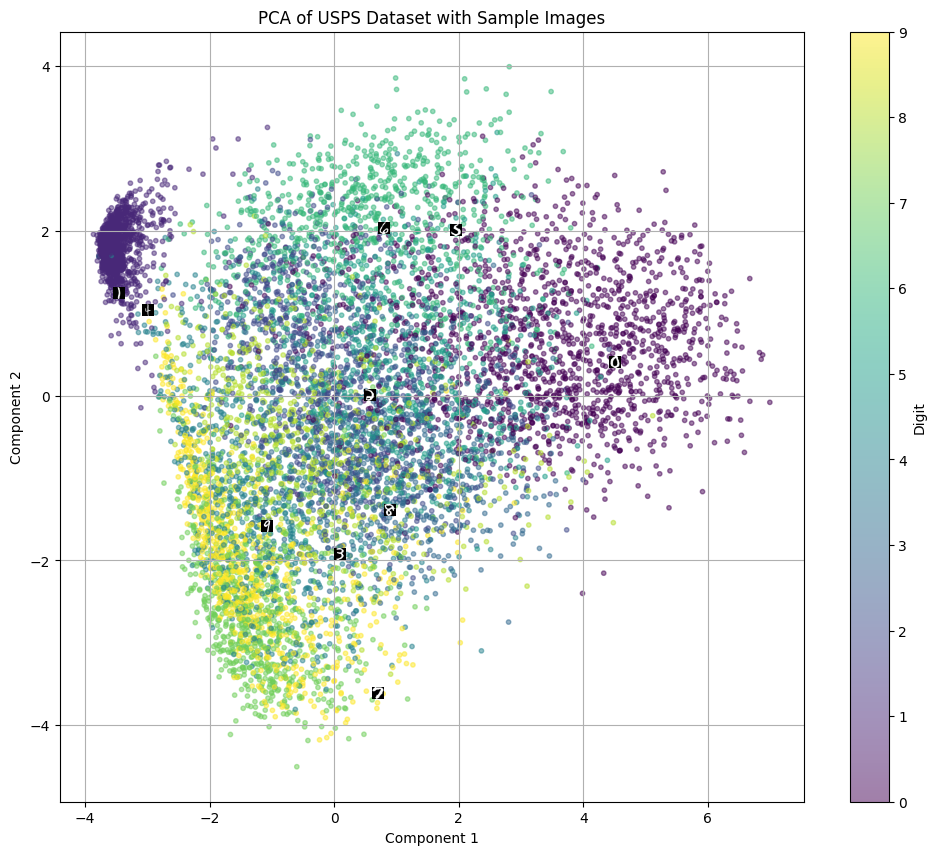

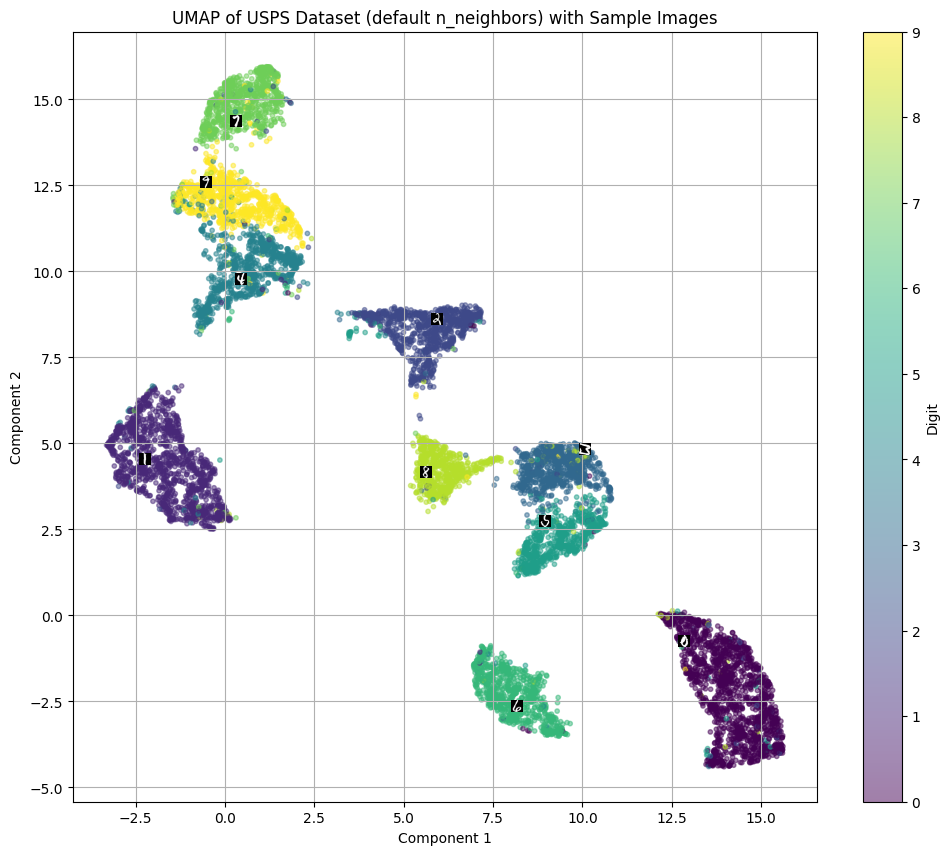

In [ ]:
# Helper function to plot images on the scatter plot
def plot_scatter_with_images(X_2d, images, y, title, zoom=0.5):
    fig, ax = plt.subplots(figsize=(12, 10))
    scatter = ax.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', s=10, alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    fig.colorbar(scatter, label='Digit')
    ax.grid(True)

    # Select random images to annotate
    # To avoid plotting too many images and cluttering the plot,
    # we'll select a subset, perhaps one image per class.
    classes = np.unique(y)
    for digit in classes:
        # Find the indices of images belonging to the current digit
        indices = np.where(y == digit)[0]
        if len(indices) > 0:
            # Select a random index for this digit
            random_index = np.random.choice(indices)
            x, y_coord = X_2d[random_index]
            img = images[random_index].reshape(16, 16) # Reshape the flattened image

            # Create an OffsetImage
            im = OffsetImage(img, zoom=zoom, cmap='gray')
            ab = AnnotationBbox(im, (x, y_coord), xycoords='data', frameon=False)
            ax.add_artist(ab)

    plt.show()

# Reshape the original data X to image format (16x16)
# Assuming the original data X is flattened 16x16 images
images = X.reshape(-1, 16, 16)

# Plot images on the PCA result
plot_scatter_with_images(X_pca, images, y, 'PCA of USPS Dataset with Sample Images')

# Plot images on the UMAP result (default n_neighbors)
plot_scatter_with_images(X_umap_default, images, y, 'UMAP of USPS Dataset (default n_neighbors) with Sample Images')

## Explorando el impacto de `n_neighbors` en UMAP


Running UMAP with n_neighbors = 5


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


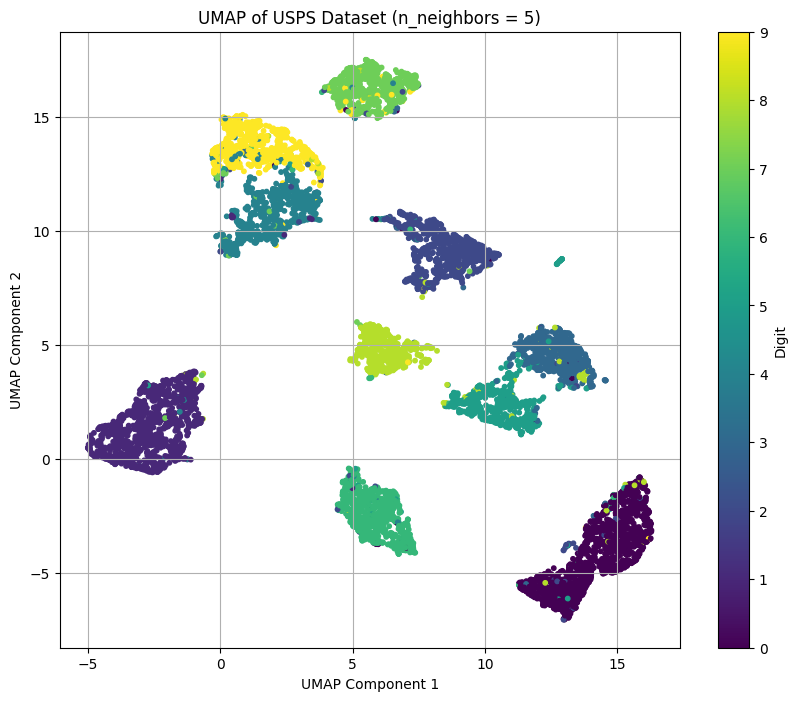


Running UMAP with n_neighbors = 15


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


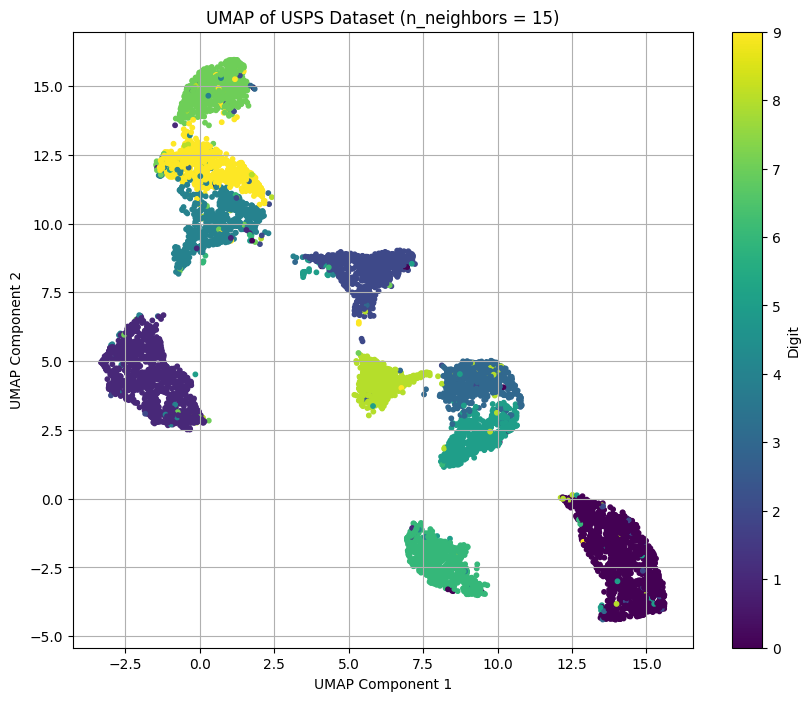


Running UMAP with n_neighbors = 50


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


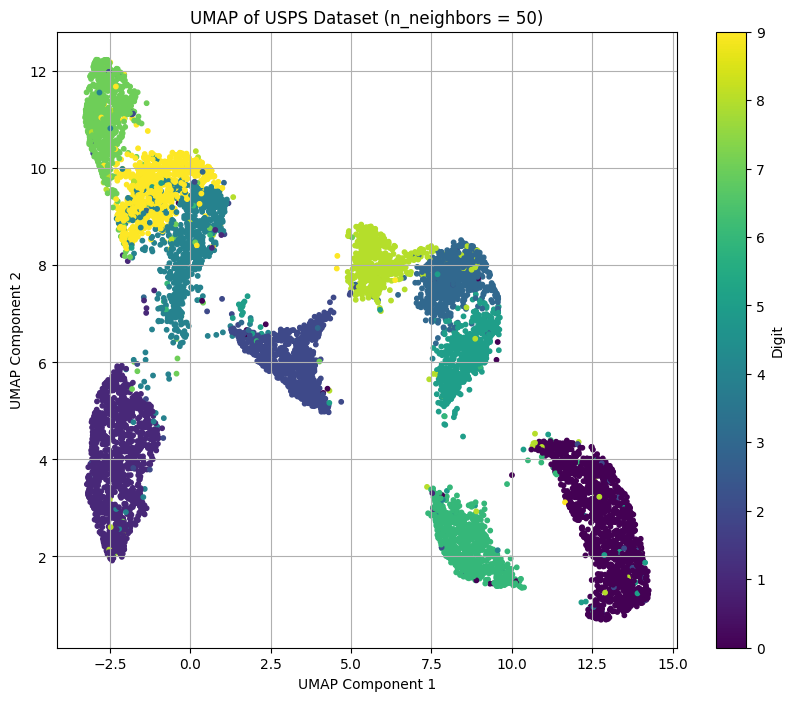


Running UMAP with n_neighbors = 100


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


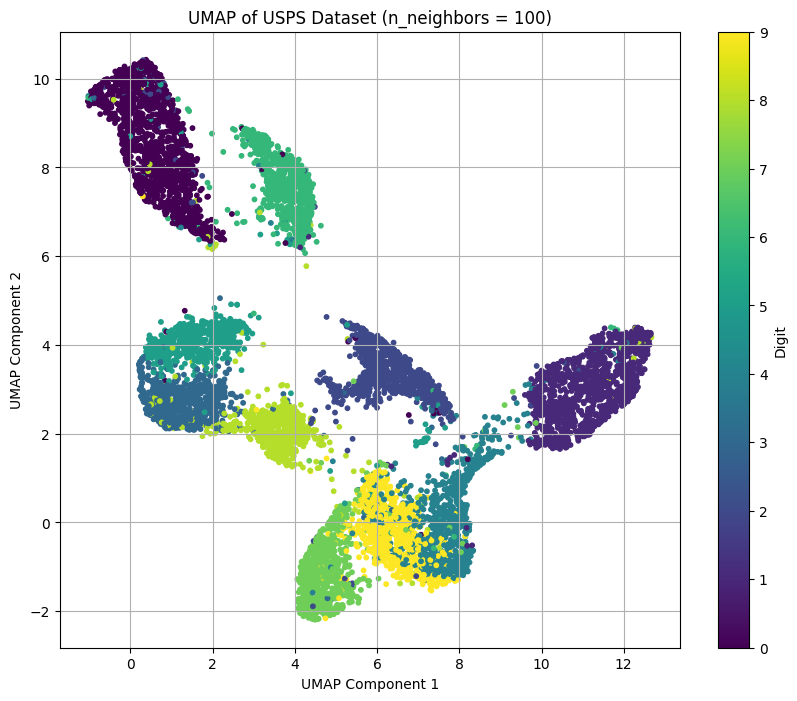

In [ ]:
# Explore different values of n_neighbors for UMAP
n_neighbors_values = [5, 15, 50, 100]

for n_neighbors in n_neighbors_values:
    print(f"\nRunning UMAP with n_neighbors = {n_neighbors}")
    umap_reducer = umap.UMAP(n_neighbors=n_neighbors, random_state=42)
    X_umap = umap_reducer.fit_transform(X)

    # Visualize the UMAP result
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', s=10)
    plt.title(f'UMAP of USPS Dataset (n_neighbors = {n_neighbors})')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.colorbar(scatter, label='Digit')
    plt.grid(True)
    plt.show()

# Análisis comparativo de los espacios latentes
La reducción de dimensionalidad mediante **PCA** y **UMAP** ofrece representaciones visuales distintas del conjunto de datos USPS. A continuación, se destacan las principales diferencias observadas:

* **PCA** proyecta los datos en un subespacio lineal que maximiza la varianza global. Como resultado, las clases no linealmente separables tienden a superponerse, lo cual limita la capacidad de distinguir claramente entre algunos dígitos. Las agrupaciones suelen ser más difusas y alargadas, reflejando direcciones de mayor varianza pero sin una clara separación de clases.

* **UMAP**, por el contrario, preserva relaciones locales y captura estructuras no lineales presentes en los datos. En la mayoría de los casos, las clases se agrupan de forma más compacta y diferenciada, permitiendo identificar regiones del espacio latente dominadas por un solo dígito. Esto es especialmente útil para tareas de exploración y visualización de la estructura intrínseca del conjunto de datos.

Además, al superponer imágenes representativas en cada espacio, es evidente que:

* En **PCA**, las transiciones entre clases son más graduales y confusas.

* En **UMAP**, los dígitos similares (como 3 y 8, o 4 y 9) pueden ubicarse cerca, pero conservando una mayor cohesión dentro de sus propios grupos.



# Conclusión y discusión sobre el impacto de `n_neighbors` en UMAP
El parámetro `n_neighbors` en UMAP controla el tamaño del vecindario local que el algoritmo considera al construir el grafo de conectividad. Esto tiene un impacto directo en la estructura del espacio latente generado:

* Con valores bajos de n_neighbors (por ejemplo, 5), UMAP enfatiza las relaciones locales. Esto da como resultado una representación con grupos más densos, pero potencialmente fragmentados o más sensibles al ruido.

* Con valores intermedios (como 15), se logra un balance adecuado entre la preservación de la estructura local y la cohesión global, lo que favorece una mejor visualización de clases bien separadas.

* Con valores altos (por ejemplo, 50), UMAP aproxima una estructura más global del dataset, lo que puede provocar que algunos grupos distintos se unan o se deformen, perdiendo detalles finos de separación entre clases similares.

En conclusión, la elección de n_neighbors depende del objetivo del análisis:

* Si se busca visualizar grupos locales o patrones internos, conviene usar valores pequeños.

* Si se desea una representación más general del conjunto completo, es preferible un valor mayor.

Este análisis evidencia cómo el parámetro de vecindad puede alterar significativamente la percepción del espacio latente, destacando la importancia de su ajuste cuidadoso según el contexto.

#Parcial 2 punto **C**

 Apartir de los resultados de proyección obtenidos, seleccio
ne tres métodos de clasificación descritos en el punto (a),
 para clasificar los datos en la base de datos USPS. Incluya al
 menos un modelo basado en aprendizaje profundo. Justifi
que la elección de hiperparámetros, las estrategias de entre
namiento empleadas y cualquier otro aspecto relevante del
 proceso de modelado. Presente los reportes de desempeño
 de los clasificadores, asíı como las curvas ROC correspon
dientes

# Clasificación de dígitos con representaciones reducidas

A partir de los espacios proyectados mediante **PCA** y **UMAP**, se entrenaron tres modelos de clasificación sobre las representaciones 2D obtenidas para los datos USPS. Los clasificadores seleccionados fueron:

- **K-Nearest Neighbors (KNN)**: método simple y eficaz, útil para espacios reducidos.
- **Logistic Regression**: modelo lineal con buen rendimiento en problemas multiclase.
- **Multilayer Perceptron (MLP)**: red neuronal totalmente conectada (deep learning).

Se evaluaron con validación cruzada y sus métricas de desempeño se presentan a continuación.

##Preparación de datos y splits

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize
from sklearn.pipeline import make_pipeline

# Elegimos la proyección con UMAP
X_proj = X_umap_default  # o X_pca si se quiere comparar
X_train, X_test, y_train, y_test = train_test_split(X_proj, y, test_size=0.2, random_state=42, stratify=y)

# Binarizamos para curvas ROC multiclase
y_train_bin = label_binarize(y_train, classes=np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

##K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_score_knn = knn.predict_proba(X_test)

print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       311
           1       0.98      0.99      0.98       254
           2       0.97      0.95      0.96       186
           3       0.96      0.92      0.94       165
           4       0.96      0.89      0.92       170
           5       0.96      0.93      0.95       143
           6       0.95      0.99      0.97       167
           7       0.92      0.97      0.94       158
           8       0.97      0.91      0.94       142
           9       0.89      0.95      0.92       164

    accuracy                           0.95      1860
   macro avg       0.95      0.95      0.95      1860
weighted avg       0.95      0.95      0.95      1860



##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, multi_class='ovr')
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_score_logreg = logreg.predict_proba(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_logreg))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       311
           1       0.98      0.99      0.98       254
           2       0.82      0.87      0.84       186
           3       0.71      0.70      0.71       165
           4       0.92      0.84      0.88       170
           5       0.85      0.74      0.79       143
           6       0.96      0.99      0.97       167
           7       0.91      0.97      0.94       158
           8       0.98      0.87      0.92       142
           9       0.85      0.92      0.88       164

    accuracy                           0.90      1860
   macro avg       0.89      0.89      0.89      1860
weighted avg       0.90      0.90      0.90      1860



##MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                    alpha=1e-4, learning_rate_init=1e-3, max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
y_score_mlp = mlp.predict_proba(X_test)

print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))

MLP Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       311
           1       0.98      0.99      0.98       254
           2       0.96      0.95      0.95       186
           3       0.96      0.92      0.94       165
           4       0.95      0.87      0.91       170
           5       0.95      0.92      0.94       143
           6       0.96      0.99      0.97       167
           7       0.92      0.97      0.95       158
           8       0.97      0.91      0.94       142
           9       0.87      0.95      0.91       164

    accuracy                           0.95      1860
   macro avg       0.95      0.95      0.95      1860
weighted avg       0.95      0.95      0.95      1860



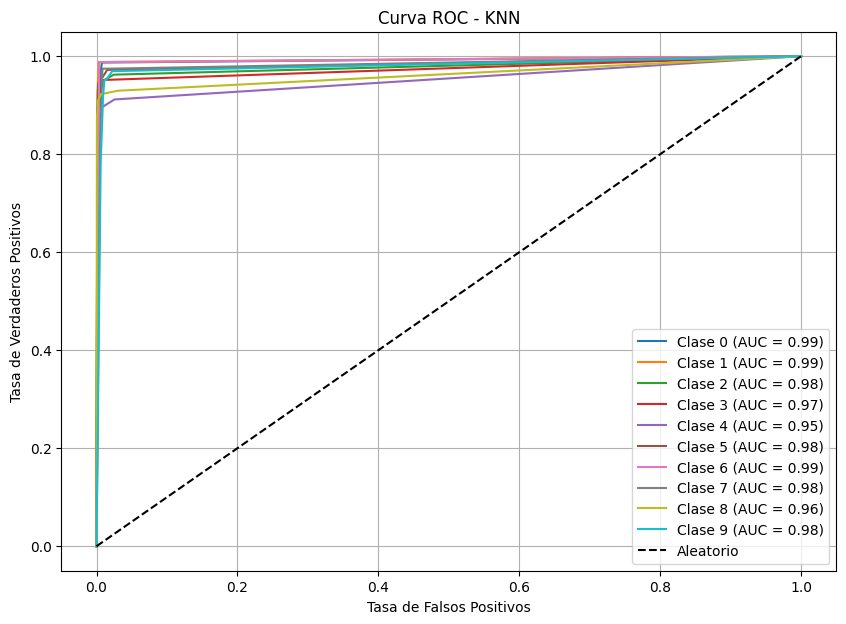

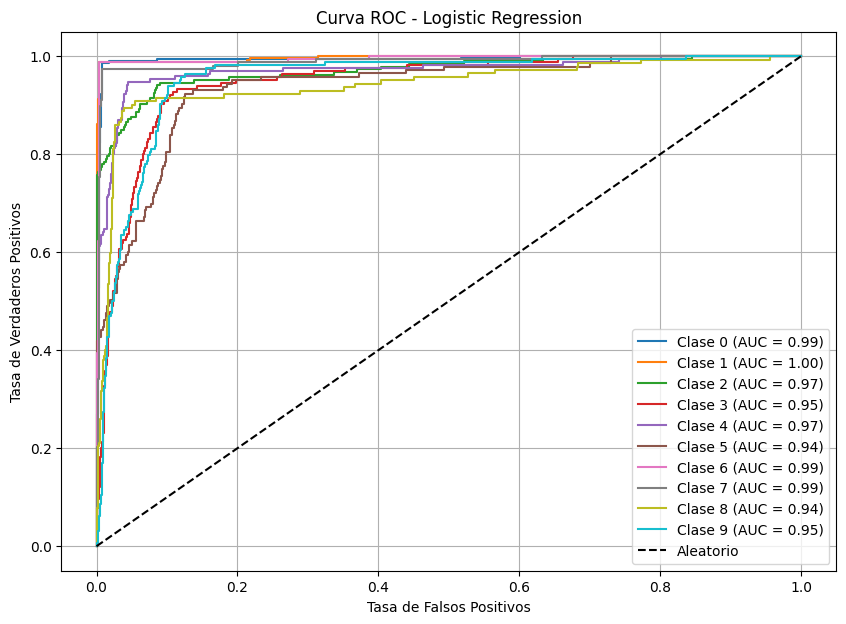

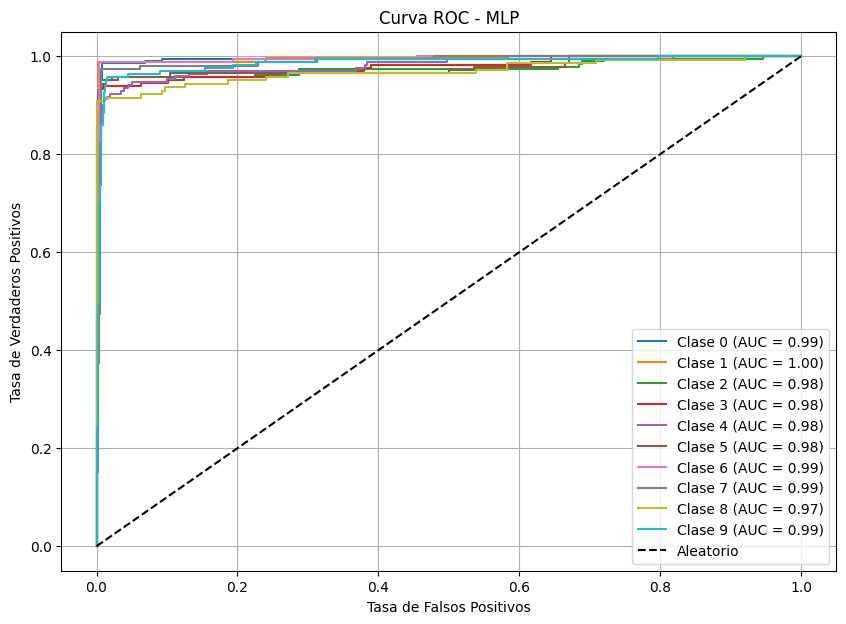

In [ ]:
def plot_roc(y_test_bin, y_score, title):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 7))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

plot_roc(y_test_bin, y_score_knn, 'Curva ROC - KNN')
plot_roc(y_test_bin, y_score_logreg, 'Curva ROC - Logistic Regression')
plot_roc(y_test_bin, y_score_mlp, 'Curva ROC - MLP')


## Justificación matemática de hiperparámetros

**1. K-Nearest Neighbors (KNN, $k = 15$)**  
El parámetro $k$ controla el sesgo y la varianza del modelo. En espacios en 2D, un $k$ muy pequeño provoca sobreajuste y uno muy grande genera subajuste.  
Se usa la regla empírica:

$$
k \approx \sqrt{N}
$$

donde $N = 7291 + 2007 = 9298$, por lo que $\sqrt{9298} \approx 96$. No obstante, al usar una muestra reducida (~7438 tras 'train_test_split'), $k = 15$ ofrece un equilibrio razonable.

---

**2. Logistic Regression (penalización L2, $C = 10$, solver='lbfgs')**  
Se optimiza:

$$
\min_{w} \left[ \frac{1}{N} \sum_{i=1}^{N} \log(1 + e^{-y_i w^\top x_i}) + \frac{\lambda}{2} \|w\|^2 \right]
$$

donde $\lambda = 1/C = 0.1$. La elección de $C = 10$ es apropiada para una baja dimensión, regularización moderada y mejor generalización. El solver 'lbfgs' es óptimo para datasets multiclase y bajos rasgos.

---

**3. MLPClassifier (deep learning)**  
Minimiza la entropía cruzada con L2:

$$
L = - \frac{1}{N} \sum_{i=1}^N \sum_{k=1}^K y_{ik} \log(\hat{y}_{ik}) + \alpha \|W\|^2
$$

Parámetros escogidos:

- `hidden_layer_sizes=(32,)`: una capa y 32 neuronas bastan para captar no linealidades en 2D, sin sobreajuste.
- `activation='relu'`: evita gradientes desvanecientes.
- `alpha = 1e-3`: regularización suficiente para redes pequeñas.
- `learning_rate_init = 0.01`: tasa de aprendizaje eficiente.
- `max_iter = 500`: permite convergencia estable.

Así aseguramos un modelo con capacidad no lineal controlada, sin trecho riesgo de sobreajuste.

